#### OOD GANS Walkthrough

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from config import *
from dataset import MNIST, CIFAR10
from models.mnist_cnn import MNISTCNN
from models.gans import *
from models.dc_gan_model import *
# from trainer import train # Not needed for OOD GANS

# import autoreload code
%load_ext autoreload
%autoreload 2

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


### Dataset Processing


In [4]:
mnist_tri_set, mnist_val_set, mnist_tri_loader, mnist_val_loader = MNIST(128, 32, 2, True)
cifar_tri_set, cifar_val_set , cifar_tri_loader, cifar_val_loader = CIFAR10(128, 32)
# TODO: Show dataset statistics and sample images.

Files already downloaded and verified
Files already downloaded and verified


### Original GANS Implementation

In [ ]:
D = discriminator(gan_type=GAN_TYPE.NAIVE).to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### Original Deep Convolutional GAN Implementation

In [ ]:
D = dc_discriminator().to(DEVICE)
G = dc_generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### OOD GAN Sample Training with GDLossTracker



Files already downloaded and verified
Files already downloaded and verified
Iter: 0, D: 0.8087, G:0.7829


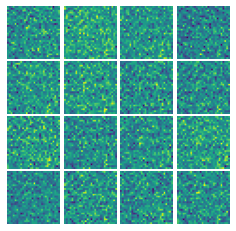

ic| 'Sample Training with GD_Loss_tracker Finished.'


In [5]:
# TODO: Launch this on Google Colab
from utils import *
D = discriminator(gan_type=GAN_TYPE.OOD).to(DEVICE)
G = generator().to(DEVICE)
# Training with Loss Tracker (for debugging)
GDlsTracker = GDLossTracker(10)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss,
            gan_type=GAN_TYPE.OOD, ood_img_sample=CIFAR10,gd_ls_tracker=GDlsTracker, 
            gd_ls_track_iter=10)

In [1]:
GDlsTracker.plt_ls(save_fname='g_loss', num_iter=10, type=GD.G)

NameError: name 'GDlsTracker' is not defined